# **14차시: 모델링 개요 및 데이터 세트 분할**
## 🔍 **학습목표**
- 머신러닝 모델 학습을 위한 전체 과정 흐름을 이해한다.
- 분류와 회귀 문제의 차이를 파악한다.
- 학습용과 평가용 데이터를 나누는 이유를 이해하고, train_test_split() 함수를 사용할 수 있다.  

## 📌 **머신러닝 모델 학습 전체 과정 설명**


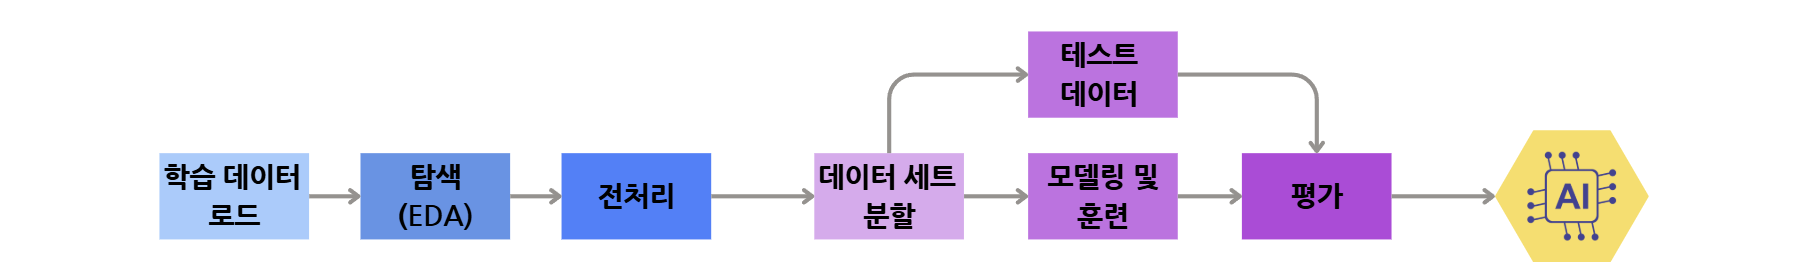

## **1. 문제 유형 정의**

- 예측하고자 하는 문제 유형을 명확히 설정합니다.
  - **회귀**: 숫자 예측 (예: 가격, 시간, 연비 등)
  - **이진분류**: 두 가지 결과 (예: 합격/불합격, 스팸/정상)
  - **다중분류**: 세 가지 이상 범주 (예: 고객등급, 질병 종류)


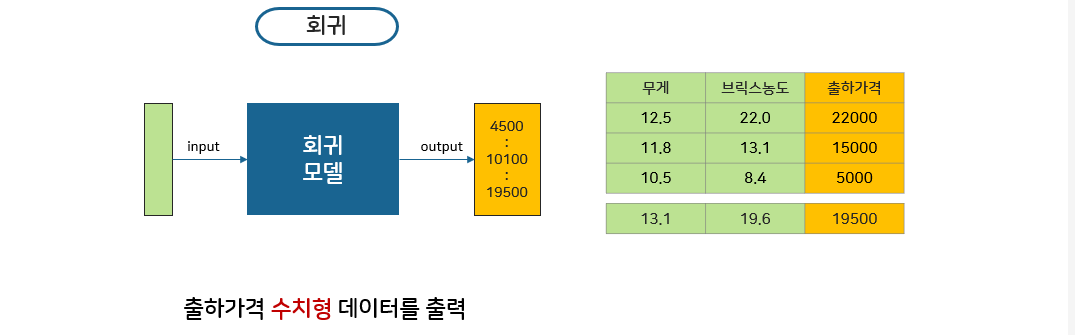

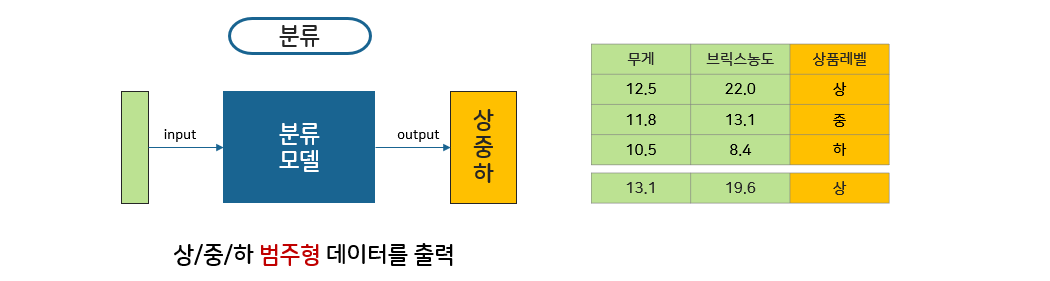

## **2. 데이터 수집 및 불러오기**

- CSV, Excel, JSON 등 다양한 형식의 데이터를 `pandas`를 이용해 불러옵니다.
- 예: pd.read_csv('파일이름.csv')

## **3. EDA (탐색적 데이터 분석)**

- 데이터의 구성, 분포, 통계량을 확인하고 변수 간의 관계를 파악한다.
- df.info(), df.describe(), sns.heatmap(), sns.pairplot() 등 활용

## **4. 데이터 전처리**

- 결측치 처리: df.dropna(), df.fillna()
- 이상치 처리: IQR 또는 도메인 기준 필터링
- 변수 선택/삭제, 파생변수: 의미 없는 변수 제거 및 새로운 변수 생성

- 인코딩: 범주형 데이터를 숫자로 변환 (예: LabelEncoder, get_dummies)
- 스케일링: 수치형 데이터의 범위를 균일하게 변환 (StandardScaler, MinMaxScaler, RobustScaler)



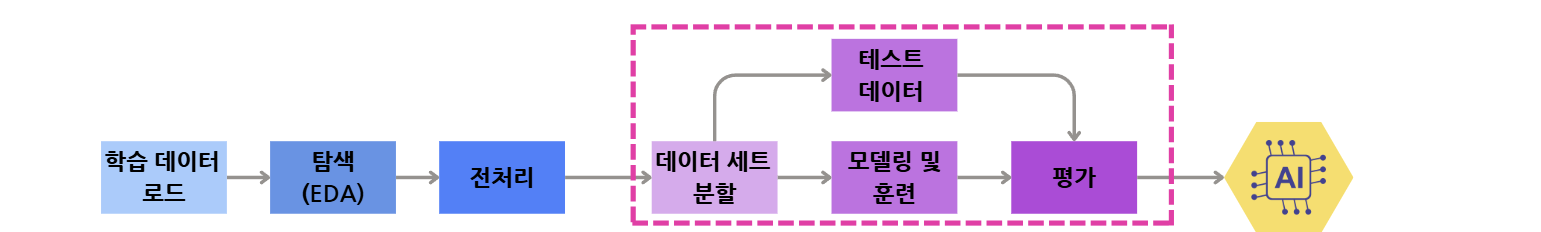

## **5. 데이터셋 분리**

- 1단계: Feature / Label 분리
    - 입력 데이터 X, 타겟 변수 y로 분리
    - 예: X = df.drop('target', axis=1), y = df['target']

- 2단계: 모델 학습을 위한 훈련/검증 데이터셋 분할
    - 예: train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


## **6. 모델 학습**

- 문제 유형에 따라 적절한 모델 선택
- 회귀: LinearRegression
- 이진분류: LogisticRegression
- 다중분류: RandomForestClassifier, DecisionTreeClassifier, KNeighborsClassifier

## **7. 모델 예측 및 성능 평가**

- model.predict(x_test)

- 평가 지표:

    - 회귀: MSE, MAE, RMSE, R²
    - 분류: Accuracy, Precision, Recall, F1-score, AUC
    - 시각화: confusion_matrix, classification_report, sns.heatmap()

---

## **1. Feature와 Label 분리**


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# 미니 회귀 데이터셋
# 문제 정의: 공부 시간에 따른 시험점수 예측 모델 만들기
df_reg = pd.DataFrame({
    '공부시간': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    '시험점수': [35, 40, 50, 55, 60, 65, 70, 75, 85, 95]
})
df_reg

,공부시간,시험점수
0,1,35
1,2,40
2,3,50
3,4,55
4,5,60
5,6,65
6,7,70
7,8,75
8,9,85
9,10,95


In [3]:
y = df_reg['시험점수'] #label
X = df_reg.drop('시험점수',axis=1) #feature

#Featuer:Dataframe 형식으로, Label: Series 형식으로 나와야함.
X.shape,y.shape

((10, 1), (10,))

In [8]:
y.shape

(10,)

In [4]:
type(X) ,type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

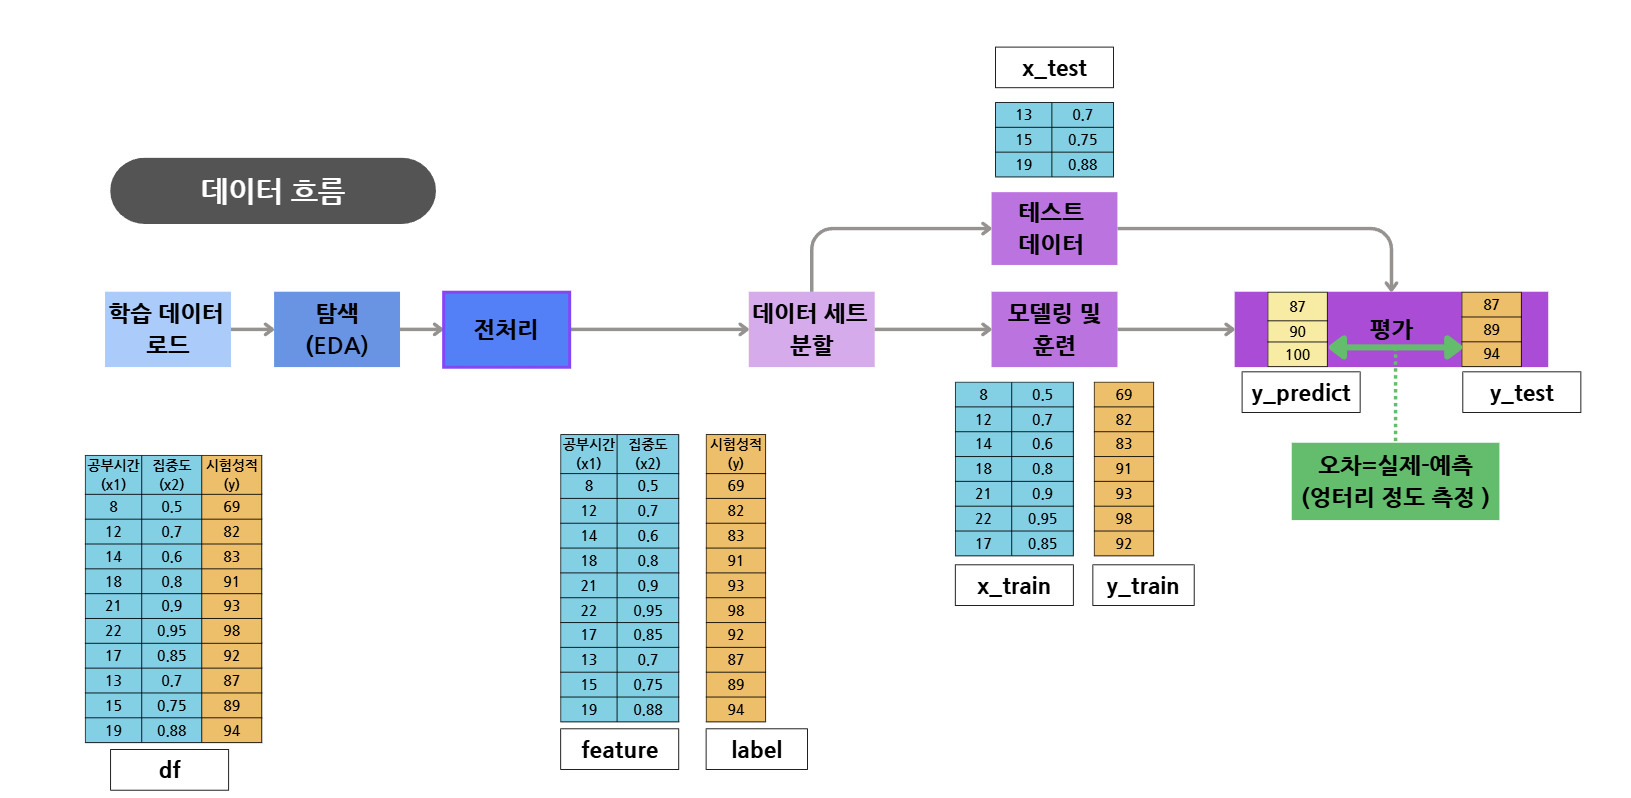

## **2. 데이터 훈련용/검증용으로 분할:train_test_split()**


### **2-1. random_state**
- **무작위 분할의 결과를 고정**시키기 위한 설정값입니다.
- 동일한 데이터와 옵션이라도 `random_state`를 다르게 하면 **다른 분할 결과**가 나옵니다.

> **왜 random_state를 고정해야 할까?**
- **재현 가능성**: 코드를 실행할 때마다 분할이 바뀌면 결과도 달라지므로, 동일한 결과를 보장하기 위해 필요합니다.
- **실험 비교의 일관성 유지**: 여러 모델이나 파라미터 조합을 비교할 때, 데이터 분할이 동일해야 공정한 비교가 가능합니다.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print("X_train:")
print(X_train)
print("\nX_test:")
print(X_test)

X_train:
   공부시간
4     5
0     1
3     4
1     2
7     8
8     9
5     6

X_test:
   공부시간
2     3
9    10
6     7


### **2-2. test_size**
- 전체 데이터 중에서 **검증용 데이터(test set)의 비율 또는 개수**를 지정하는 인자입니다.
- 일반적으로 `0.2` 또는 `0.3`을 자주 사용합니다.

In [6]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.3)
print("X_train:")
print(X_train)
print("\nX_test:")
print(X_test)

X_train:
   공부시간
4     5
0     1
3     4
1     2
7     8
8     9
5     6

X_test:
   공부시간
2     3
9    10
6     7


### **2-3. stratify(분류 전용)**
- **분류 문제에서 target(label)의 클래스 비율을 유지**한 채로 train/test 데이터셋을 나누고 싶을 때 사용합니다.
- `stratify=y`로 설정하면, 전체 클래스 비율이 분할된 데이터셋에도 유지됩니다..
- **이진분류/다중분류 문제에서 필수적으로 고려되어야 하는 옵션**입니다.
- **불균형 데이터**에서 학습/검증에 나타나는 클래스 분포가 왜곡되지 않도록 방지

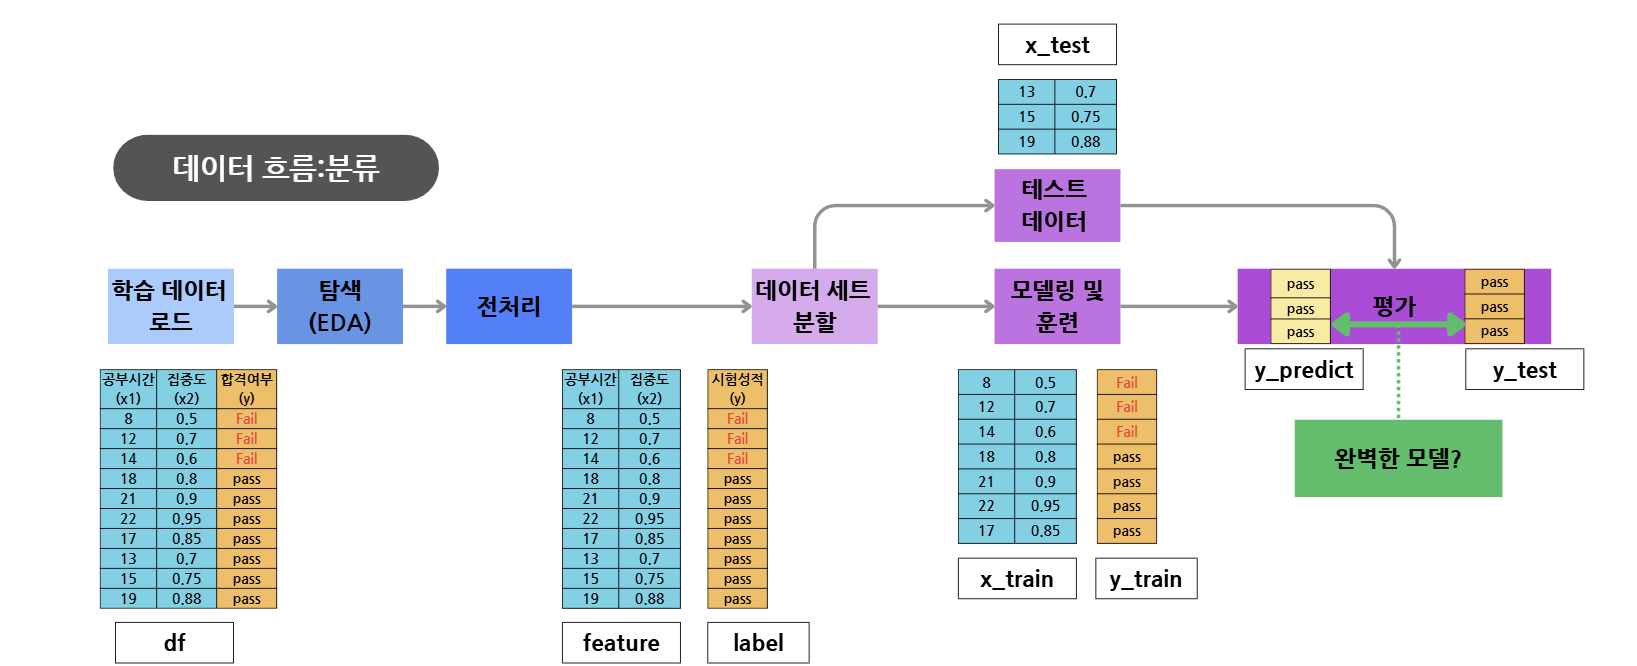

In [ ]:
df_bin = pd.DataFrame({
    '공부시간': [8, 12, 14, 18, 21, 22, 17, 13, 15, 19],
    '합격여부': [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
})

y = df_bin['합격여부']
X = df_bin.drop('합격여부',axis=1)

# stratify 없이 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

# # stratify 사용
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=4)

y_test

,합격여부
8,1
2,0
4,1


---

## **연습 문제**

### 🛍️ 배송 완료 상태 예측
A 쇼핑몰 마케팅팀은 고객의 특성과 과거 데이터를 기반으로, 다양한 예측 모델을 구축하려고 합니다.
특히 주문 처리 프로세스를 개선하기 위해, 고객 주문이 **배송완료 상태에 도달할지** 여부를 사전에 예측하고자 합니다.
이제 제공된 데이터셋을 활용하여 예측 모델링을 위한 데이터 분리 단계를 수행해보세요.

사용 파일명: `온라인쇼핑몰_배송완료예측.csv`

- 고객ID: 주문 고객을 식별하는 ID
- 주문번호: 주문 단위를 구분하는 번호
- 주문일자: 주문이 접수된 날짜
- 결제금액: 해당 주문의 결제 총액
- 상품종류수: 주문에 포함된 상품 종류 개수
- 고객등급: 고객의 등급 (예: 일반, 우수, VIP)
- 재구매여부: 과거에 해당 고객이 재구매한 이력 (0/1)
- 배송방식: 택배/퀵배송 등
- 배송지역: 지역 정보
- 배송완료여부: 배송이 실제로 완료되었는지 여부 (**예측 목표 label**)

### **문제 1. 다음과 같은 예측 목표를 기반으로 문제 유형을 구분하고, `답안01`변수에 저장하시오.**
1. 회귀
2. 이진분류
3. 다중분류





In [ ]:
# 여기에 코드를 작성하세요.


### **문제 2. 아래 조건에 따라 입력(X), 출력(y) 데이터를 분리하세요.**

  - 예측 목표(label): `배송완료여부` 컬럼을 사용하세요.
  - 제외할 컬럼: `고객ID`, `주문번호`, `배송완료여부` (※ label 및 식별자)


In [10]:
#이 셀안의 코드를 먼저 실행하시오.
import pandas as pd
df = pd.read_csv('데이터세트/온라인쇼핑몰_배송완료예측.csv')
df.head()

,주문ID,배송완료여부,고객등급,고객명,성별,나이,동시주문상품수,쿠폰사용횟수,주문번호,결제금액,배송지코드,주문채널
0,1,0,3,이지훈,남성,22.0,1,0,ORD2024-000001,7000,NaN,웹
1,2,1,1,정하영,여성,38.0,1,0,ORD2024-000002,71000,SEO-850,모바일
2,3,1,3,최민수,여성,26.0,0,0,ORD2024-000003,8000,NaN,웹
3,4,1,1,이도윤,여성,35.0,1,0,ORD2024-000004,53000,BS-743,웹
4,5,0,3,이채원,남성,35.0,0,0,ORD2024-000005,8000,NaN,웹


In [11]:
# 여기에 코드를 작성하세요.
l=df['배송완료여부']
f=df.drop(['주문ID','주문번호','배송완료여부'],axis=1)
f.shape, l.shape

((891, 9), (891,))

### **문제 3. 위에서 분리한 X, y 데이터를 다음 조건으로 분리하세요.**

  - 검증 데이터 비율: 30%
  - 클래스 비율 유지: `stratify=y` 사용
  - 랜덤 시드: 42


In [18]:
from sklearn.model_selection import train_test_split
# 여기에 코드를 작성하세요.
ftr,fte,ltr,lte=train_test_split(f,l,test_size=0.3,stratify=l,random_state=42)

In [19]:
ftr

,고객등급,고객명,성별,나이,동시주문상품수,쿠폰사용횟수,결제금액,배송지코드,주문채널
748,1,조도윤,남성,19.0,1,0,53000,BS-528,웹
45,3,최채원,남성,NaN,0,0,8000,NaN,웹
28,3,김하영,여성,NaN,0,0,8000,NaN,전화
633,1,김민수,남성,NaN,0,0,0,NaN,웹
403,3,윤민수,남성,28.0,1,0,16000,NaN,웹
...,...,...,...,...,...,...,...,...,...
476,2,한지훈,남성,34.0,1,0,21000,NaN,웹
190,2,장지훈,여성,32.0,0,0,13000,NaN,웹
736,3,김지아,여성,48.0,1,3,34000,NaN,웹
462,1,윤서연,남성,47.0,0,0,38000,BS-232,웹


In [20]:
ltr

748    0
45     0
28     1
633    0
403    0
      ..
476    0
190    1
736    0
462    0
136    1
Name: 배송완료여부, Length: 623, dtype: int64

In [21]:
fte

,고객등급,고객명,성별,나이,동시주문상품수,쿠폰사용횟수,결제금액,배송지코드,주문채널
625,1,장하영,남성,61.0,0,0,32000,BS-142,웹
566,3,최채원,남성,19.0,0,0,8000,NaN,웹
459,3,한서연,남성,NaN,0,0,8000,NaN,전화
804,3,정예린,남성,27.0,0,0,7000,NaN,웹
338,3,서하영,남성,45.0,0,0,8000,NaN,웹
...,...,...,...,...,...,...,...,...,...
184,3,윤민수,여성,4.0,0,2,22000,NaN,웹
607,1,서민수,남성,27.0,0,0,30000,NaN,웹
624,3,최서연,남성,21.0,0,0,16000,NaN,웹
103,3,이도윤,남성,33.0,0,0,9000,NaN,웹


In [22]:
lte

625    0
566    0
459    0
804    1
338    1
      ..
184    1
607    1
624    0
103    0
387    1
Name: 배송완료여부, Length: 268, dtype: int64